# Implementation
The problem we are going to look at is the International Airline Passengers prediction problem.

This is a problem where, given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.

Below is a sample of the first few lines of the file.


"Month","Passengers"

"1949-01",112

"1949-02",118

"1949-03",132

"1949-04",129

"1949-05",121

We can load this dataset easily using the Pandas library. We are not interested in the date, given that each observation is separated by the same interval of one month. Therefore, when we load the dataset we can exclude the first column.

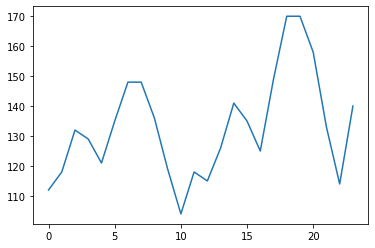

In [1]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('airline-passengers.txt', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

# Long Short-Term Memory Network
The Long Short-Term Memory network, or LSTM network, is a recurrent neural network that is trained using Backpropagation Through Time and overcomes the vanishing gradient problem.

As such, it can be used to create large recurrent networks that in turn can be used to address difficult sequence problems in machine learning and achieve state-of-the-art results.

Instead of neurons, LSTM networks have memory blocks that are connected through layers.

A block has components that make it smarter than a classical neuron and a memory for recent sequences. A block contains gates that manage the block’s state and output. A block operates upon an input sequence and each gate within a block uses the sigmoid activation units to control whether they are triggered or not, making the change of state and addition of information flowing through the block conditional.

There are three types of gates within a unit:

Forget Gate: conditionally decides what information to throw away from the block.

Input Gate: conditionally decides which values from the input to update the memory state.

Output Gate: conditionally decides what to output based on input and the memory of the block.

Each unit is like a mini-state machine where the gates of the units have weights that are learned during the training procedure.

## LSTM Network for Regression
We can phrase the problem as a regression problem.

That is, given the number of passengers (in units of thousands) this month, what is the number of passengers next month?

We can write a simple function to convert our single column of data into a two-column dataset: the first column containing this month’s (t) passenger count and the second column containing next month’s (t+1) passenger count, to be predicted.

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [3]:
dataframe = pandas.read_csv('airline-passengers.txt', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [4]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

With time series data, the sequence of values is important. A simple method that we can use is to split the ordered dataset into train and test datasets. The code below calculates the index of the split point and separates the data into the training datasets with 67% of the observations that we can use to train our model, leaving the remaining 33% for testing the model.

In [5]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

16 8


This default will create a dataset where X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t + 1).

In [6]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

Let’s use this function to prepare the train and test datasets for modeling.

In [7]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

If you compare these first 5 rows to the original dataset sample, you can see the X=t and Y=t+1 pattern in the numbers.


X,        Y

112,		118

118,		132

132,	129

129,		121

121,		135

In [8]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], look_back, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], look_back, testX.shape[1]))

In [9]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.2007
Epoch 2/100
 - 0s - loss: 0.1793
Epoch 3/100
 - 0s - loss: 0.1606
Epoch 4/100
 - 0s - loss: 0.1442
Epoch 5/100
 - 0s - loss: 0.1280
Epoch 6/100
 - 0s - loss: 0.1139
Epoch 7/100
 - 0s - loss: 0.1011
Epoch 8/100
 - 0s - loss: 0.0903
Epoch 9/100
 - 0s - loss: 0.0798
Epoch 10/100
 - 0s - loss: 0.0708
Epoch 11/100
 - 0s - loss: 0.0628
Epoch 12/100
 - 0s - loss: 0.0586
Epoch 13/100
 - 0s - loss: 0.0514
Epoch 14/100
 - 0s - loss: 0.0480
Epoch 15/100
 - 0s - loss: 0.0441
Epoch 16/100
 - 0s - loss: 0.0414
Epoch 17/100
 - 0s - loss: 0.0400
Epoch 18/100
 - 0s - loss: 0.0378
Epoch 19/100
 - 0s - loss: 0.0366
Epoch 20/100
 - 0s - loss: 0.0357
Epoch 21/100
 - 0s - loss: 0.0355
Epoch 22/100
 - 0s - loss: 0.0347
Epoch 23/100
 - 0s - loss: 0.0343
Epoch 24/100
 - 0s - loss: 0.0338
Epoch 25/100
 - 0s - loss: 0.0335
Epoch 26/100
 - 0s - loss: 0.0333
Epoch 27/100
 - 0s - loss: 0.0331
Epoch 28/100
 - 0s - loss: 0.0328
Epoch 29/100
 - 0s - loss: 0.0326
Epoch 30/100
 - 0s - lo

The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, and an output layer that makes a single value prediction. The default sigmoid activation function is used for the LSTM blocks. The network is trained for 100 epochs and a batch size of 1 is used.

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. Once prepared, the data is plotted, showing the original dataset in blue, the predictions for the training dataset in green, and the predictions on the unseen test dataset in red.

In [10]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(10,8))
plt.plot(scaler.inverse_transform(dataset),color='b')
plt.plot(trainPredictPlot,color='g')
plt.plot(testPredictPlot,color='r')
plt.show()

NameError: name 'trainPredict' is not defined